In [1]:
from common import *
from experiment import *
from data import RawData, PlottableData

# Initialize data

* We aim to test releases of each congestion control algorithm implementation,
maybe twice a year, dating back to 2016. Say June 1 and December 1.
Call these CCAs, e.g., `bbr-20241201`, `bbr-20240601`, possibly `bbr1-20161201`.
* In **TCPBenchmark**, the Python code keeps the `<cca>` as is and sets the Linux 
congestion control module `sysctl -w net.ipv4.tcp_congestion_control=<cca>`.
_We should preload modules with these names in the Linux kernel._
* In **QUICBenchmark**, the Python code converts the `<cca>` into an `<option>`
such as `TBBR-20240101`. The Chromium QUIC code receives this option via
`--client_connection_options=<option>` and `--connection_options=<option>`.
_We should pre-compile congestion control files linked to these options
in the Chromium QUIC code._
* These may be challenging, depending on how consistent the interfaces
between Linux kernel congestion control modules and TCP, and
Chromium QUIC congestion control modules and the newest toy client
and server, are over time.
* In the TCP benchmark, we can add another layer in the Python code from the
date to the actual module, similar to what exists in the QUIC benchmark.

In [2]:
# Generate the ccas to test
ccas = []
for year in reversed(range(2016, 2025)):
    for month in reversed([6, 12]):
        ccas.append(f'bbr-{year}{month:02d}{1:02d}')
ccas

['bbr-20241201',
 'bbr-20240601',
 'bbr-20231201',
 'bbr-20230601',
 'bbr-20221201',
 'bbr-20220601',
 'bbr-20211201',
 'bbr-20210601',
 'bbr-20201201',
 'bbr-20200601',
 'bbr-20191201',
 'bbr-20190601',
 'bbr-20181201',
 'bbr-20180601',
 'bbr-20171201',
 'bbr-20170601',
 'bbr-20161201',
 'bbr-20160601']

In [3]:
# Generate the treatments
treatments = {
    'tcp': [],
    'pep': [],
    'quic': [],
}
for cca in ccas:
    treatments['tcp'].append(TCPTreatment(cca=cca, pep=False))
    treatments['pep'].append(TCPTreatment(cca=cca, pep=True))
    treatments['quic'].append(QUICTreatment(cca=cca))
print(list(treatments.keys()))

['tcp', 'pep', 'quic']


In [4]:
# Generate a representative network setting and data size
# TODO
network_setting = NetworkSetting()
data_size = 10000000 # 10 MByte

# Plotting functions

In [5]:
def plot_bbr_over_time(data, ccas, treatments, delta=40, title='BBR Over Time', ylabel='Goodput (Mbit/s)'):
    plt.figure(figsize=(6, 4))

    assert len(data.network_settings) == 1
    network = data.network_settings[0]
    assert len(data.data_sizes) == 1
    data_size = data.data_sizes[0]

    for label, cca_treatments in treatments.items():
        xs = []
        ys = []
        yerr_lower = []
        yerr_upper = []

        for cca_treatment in cca_treatments:
            sublabel = cca_treatment.label()
            subdata = data.data[sublabel][network].get(data_size)
            if subdata is None:
                continue
            xs.append(sublabel)
            ys.append(subdata.p(50))
            yerr_lower.append(y.p(50) - y.p(50-delta))
            yerr_upper.append(y.p(50+delta) - y.p(50))

        plt.errorbar(xs, ys, yerr=(yerr_lower, yerr_upper), marker='.', capsize=5, label=label)

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.grid()
    plt.ylim(0)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)
    plt.show()

# Execute and plot data

MISSING: sudo -E python3 emulation/main.py -t 10 --label tcp_bbr-20241201 tcp -cca bbr-20241201 -n 10000000
MISSING: sudo -E python3 emulation/main.py -t 10 --label tcp_bbr-20240601 tcp -cca bbr-20240601 -n 10000000
MISSING: sudo -E python3 emulation/main.py -t 10 --label tcp_bbr-20231201 tcp -cca bbr-20231201 -n 10000000
MISSING: sudo -E python3 emulation/main.py -t 10 --label tcp_bbr-20230601 tcp -cca bbr-20230601 -n 10000000
MISSING: sudo -E python3 emulation/main.py -t 10 --label tcp_bbr-20221201 tcp -cca bbr-20221201 -n 10000000
MISSING: sudo -E python3 emulation/main.py -t 10 --label tcp_bbr-20220601 tcp -cca bbr-20220601 -n 10000000
MISSING: sudo -E python3 emulation/main.py -t 10 --label tcp_bbr-20211201 tcp -cca bbr-20211201 -n 10000000
MISSING: sudo -E python3 emulation/main.py -t 10 --label tcp_bbr-20210601 tcp -cca bbr-20210601 -n 10000000
MISSING: sudo -E python3 emulation/main.py -t 10 --label tcp_bbr-20201201 tcp -cca bbr-20201201 -n 10000000
MISSING: sudo -E python3 emu

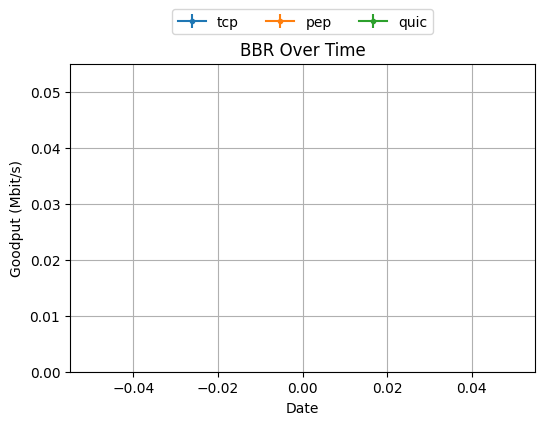

In [6]:
# Define the experiment
num_trials = 10
exp = Experiment(
    num_trials=num_trials,
    treatments=sum(treatments.values(), []),
    network_settings=[network_setting],
    data_sizes=[data_size],
)

# Collect data
execute = False
raw_data = RawData(exp, execute=execute)

# Convert to plottable data
metric = 'throughput_mbps'
plottable_data = PlottableData(raw_data, metric=metric)
plot_bbr_over_time(plottable_data, ccas=ccas, treatments=treatments)